### **Getting Portraits of U.S. Presidents from Wikipedia**

Load modules

In [1]:
from bs4 import BeautifulSoup
import requests

Access the html to generate a Repsonse object

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/Jimmy_Carter') # fetch the page
type(r) # a response object

requests.models.Response

We have the html code at hand

In [4]:
r.text # access the html text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Jimmy Carter - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-cl

Generate a BS object

In [5]:
soup = BeautifulSoup(r.text) # transform the html text into a Beauiful Soup object
type(soup)

bs4.BeautifulSoup

Get the title

In [ ]:
soup.title # get the title tag

<title>Jimmy Carter - Wikipedia</title>

Let's get Carter's portrait (the actual source file), on the right side of the page

In [3]:
soup.find_all('img')

NameError: ignored

Too broad. We get many things we do not need. Let's use the attribute `alt`

Note that `alt` stands for "alterantive text" (serving accessability and search engine optimization)

In [7]:
soup.find_all(alt = 'Portrait of Jimmy Carter in a dark blue suit')

[<img alt="Portrait of Jimmy Carter in a dark blue suit" class="mw-file-element" data-file-height="2027" data-file-width="1650" decoding="async" height="270" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/330px-JimmyCarterPortrait2.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/440px-JimmyCarterPortrait2.jpg 2x" width="220"/>]

This seems to have worked. We have a ResultSet with one item. We can use the `get()` method on that one item to get the `src` attribute, which is the source file.

In [ ]:
soup.find_all(alt = 'Portrait of Jimmy Carter in a dark blue suit')[0].get('src')

'//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg'

We still have a problem though: programming is most useful for repeated tasks---it is rarely done for one-off, ad hoc problems

If we only want the one source file for Jimmy Carter's portrait, we could simply use the web browser

What if we wanted the portrait for a broad range of people on Wikipedia? Maybe all U.S. presidents? The alt text approach will not work because all of them will have a different text

Fortunately, the portrait is embedded in an unique structure relative to other figures

There is only one `infobox` in the page. That distinguishes that image from the rest of the document. We can inspect and see that the `img` is inside another tag with class `infobox-image`.

In [9]:
rs = soup.find_all(class_ = 'infobox-image')

`find_all` is useful in verifying that we only get one unique result---which we do in this case, as expected.

After we make sure, we can use `find` to get only that one element rather than a list. (If we use `find` directly, we don't know if we're getting first out of many elements or the only unique element.)

In [10]:
print(type(rs))
print(len(rs))

<class 'bs4.element.ResultSet'>
1


Now, we need to navigate to the descendant objects. `prettify()` can help see the hierarchy better:

In [14]:
infobox_image = soup.find(class_ = 'infobox-image') # this is a td tag
print(infobox_image.prettify()) # the img tag is inside the td tag

<td class="infobox-image" colspan="2">
 <span class="mw-default-size" typeof="mw:File/Frameless">
  <a class="mw-file-description" href="/wiki/File:JimmyCarterPortrait2.jpg">
   <img alt="Portrait of Jimmy Carter in a dark blue suit" class="mw-file-element" data-file-height="2027" data-file-width="1650" decoding="async" height="270" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/330px-JimmyCarterPortrait2.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/440px-JimmyCarterPortrait2.jpg 2x" width="220"/>
  </a>
 </span>
 <div class="infobox-caption" style="line-height:normal;padding-top:0.2em;">
  Official portrait, 1978
 </div>
</td>


There are two tags that are direct descendants: `<a>` and `<span>`. The `<img>` tag is in the `<a>` tag.

In [20]:
infobox_image.span.a.img

<img alt="Portrait of Jimmy Carter in a dark blue suit" class="mw-file-element" data-file-height="2027" data-file-width="1650" decoding="async" height="270" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/330px-JimmyCarterPortrait2.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/440px-JimmyCarterPortrait2.jpg 2x" width="220"/>

But because there is only one `<img>` tag inside the whole object, we can directly go there:

In [21]:
infobox_image.img

<img alt="Portrait of Jimmy Carter in a dark blue suit" class="mw-file-element" data-file-height="2027" data-file-width="1650" decoding="async" height="270" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/330px-JimmyCarterPortrait2.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/440px-JimmyCarterPortrait2.jpg 2x" width="220"/>

We navigated back to the same object without making a reference to "Portrait of a man in a blue suit". We can get the 'src' the same way:

In [ ]:
infobox_image.img.get('src')

'//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg'

Now, we have a generic way of getting the source file for the portrait in the information box for a Wikipedia file. Let's put all of the code together:

In [22]:
page = 'https://en.wikipedia.org/wiki/Jimmy_Carter'
r = requests.get(page)
soup = BeautifulSoup(r.text)
infobox_image = soup.find(class_ = 'infobox-image')
infobox_image.img.get('src')

'//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg'

The link requires the addition of `https:` in the beginning to work:

In [23]:
'https:' + infobox_image.img.get('src')

'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JimmyCarterPortrait2.jpg/220px-JimmyCarterPortrait2.jpg'

It's not difficult to see how this could be a function where the input is the Wikipedia page, and output is a link to the source image file

In [24]:
def get_portrait(page):
    r = requests.get(page)
    soup = BeautifulSoup(r.text)
    infobox_image = soup.find(class_ = 'infobox-image')
    url = 'https:' + infobox_image.img.get('src')
    return url

Let's test for another page:

In [25]:
p = get_portrait('https://en.wikipedia.org/wiki/Walter_White_(Breaking_Bad)')

Print and download

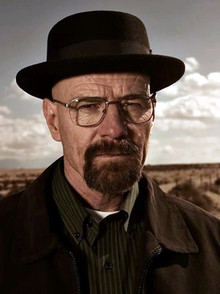

In [26]:
from IPython.display import Image
Image(p)

In [27]:
response = requests.get(p)
with open("WW.jpg", "wb") as f:
    f.write(response.content)